In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

==============================linear-fstw
(25, 4, 4)


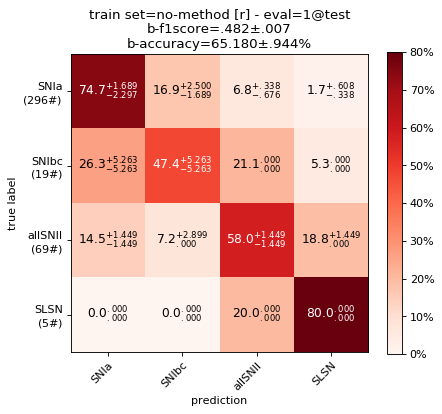

(25, 4, 4)


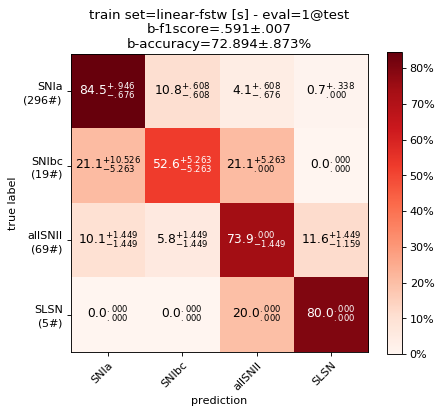

(25, 4, 4)


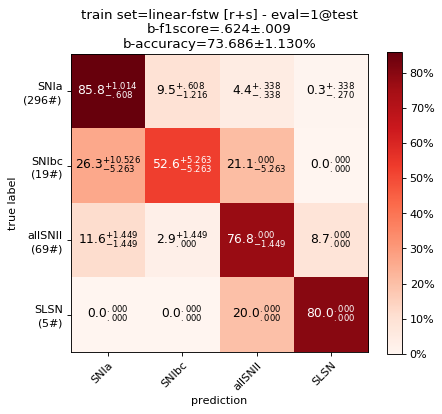

==============================bspline-fstw
(25, 4, 4)


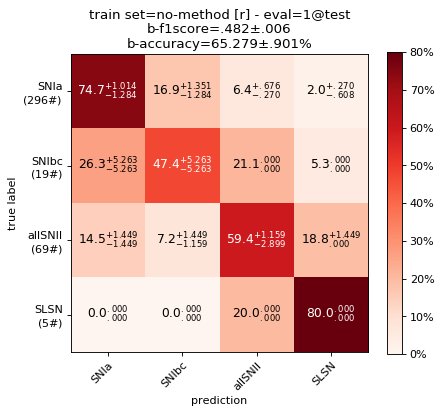

(25, 4, 4)


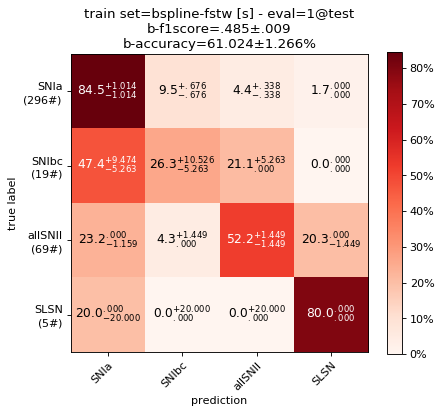

(25, 4, 4)


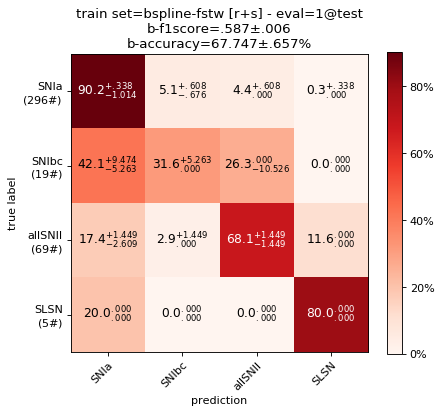

==============================spm-mcmc-fstw
(25, 4, 4)


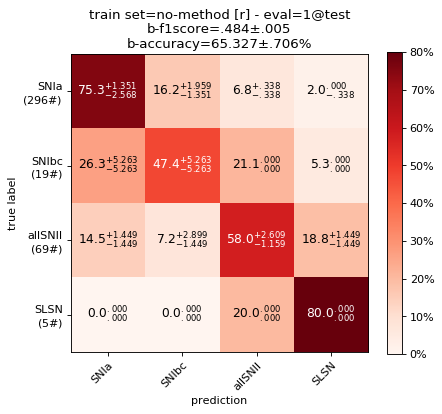

(25, 4, 4)


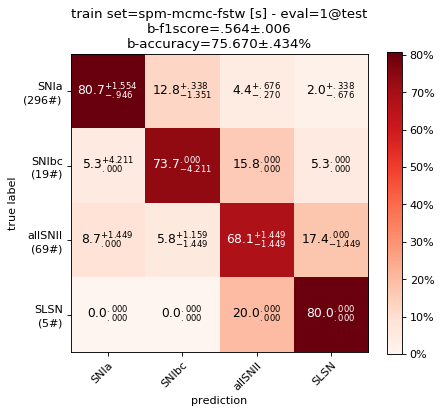

(25, 4, 4)


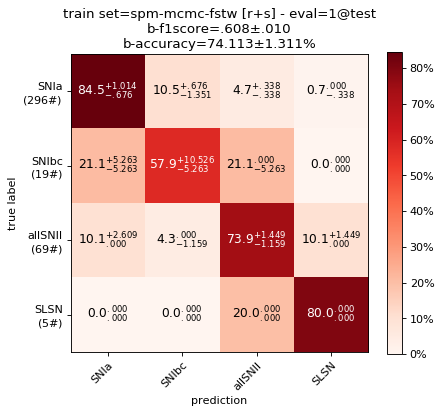

==============================spm-mcmc-estw
(25, 4, 4)


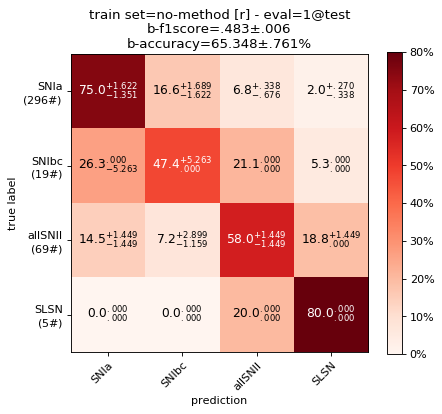

(25, 4, 4)


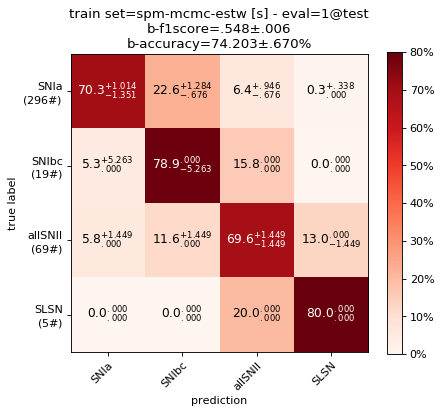

(25, 4, 4)


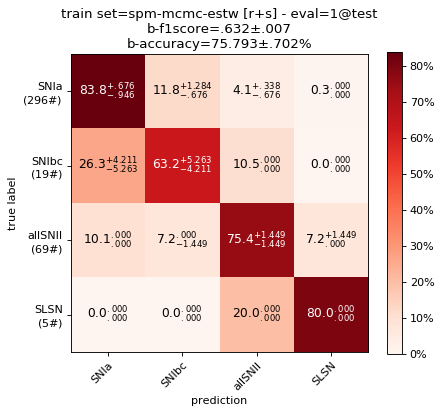

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import search_for_filedirs, gather_files_by_kfold
from flamingchoripan.cuteplots.cm_plots import plot_custom_confusion_matrix
import matplotlib.pyplot as plt
from flamingchoripan.datascience.xerror import XError

methods = [
    'linear-fstw',
    'bspline-fstw',
    #'spm-mle-fstw',
    'spm-mcmc-fstw',
    #'spm-mle-estw',
    'spm-mcmc-estw',
]
#methods = ['spm-mcmc-estw']
eval_lcset_name = 'test' # val test
kf = '1'

for method in methods:
    print('='*30+method)
    for train_config in ['r', 's', 'r+s']:
        rootdir = f'../save/exp=rf_eval~train_config={train_config}/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
        files, files_ids = gather_files_by_kfold(rootdir, kf, eval_lcset_name)
        class_names = files[0]()['lcset_info']['class_names']
        cms = np.concatenate([f()['cm'][None] for f in files], axis=0)
        f1score_xe = XError([f()['metrics_dict']['b-f1score'] for f in files])
        accuracy_xe = XError([f()['metrics_dict']['b-accuracy'] for f in files])
        print(cms.shape)

        ### plot cm
        _title = 'no-method [r]' if train_config=='r' else f'{method} [{train_config}]'
        title = ''
        title += f'train set={_title} - eval={kf}@{eval_lcset_name}'+'\n'
        title += f'b-f1score={f1score_xe}'+'\n'
        title += f'b-accuracy={accuracy_xe}%'+'\n'
        cm_kwargs = {
            'title':title[:-1],
            'figsize':(6,5),
            'new_order_classes':['SNIa', 'SNIbc', 'allSNII', 'SLSN'],
        }
        fig, ax = plot_custom_confusion_matrix(cms, class_names, **cm_kwargs)
        plt.show()

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.datascience.xerror import XError
from flamingchoripan.dataframes import DFBuilder
from flamingchoripan.latex.latex_tables import LatexTable

metrics = [
    'b-accuracy',
    'b-f1score',
    'b-gmean',
    #'b-dpower',
    'b-xentropy',
]
info_df = DFBuilder()
for metric in metrics:
    for train_config in ['r', 's', 'r+s']:
        d = {}
        for method in methods:
            rootdir = f'../save/exp=rf_eval~train_config={train_config}/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
            files, files_ids = gather_files_by_kfold(rootdir, kf, eval_lcset_name)
            metric_xe = XError([f()['metrics_dict'][metric] for f in files])
            d[method] = metric_xe

        info_df.append(f'metric={metric} [{train_config}]', d)
        
latex_kwargs = {
    'caption':f'eval-set={kf}@{eval_lcset_name}',
    'label':'?',
    'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    'hline_k':2,
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)
print('% \multicolumn{3}{c|}{}')
info_df()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\def\srule{\rule{0pt}{2ex}\rule[-1ex]{0pt}{0ex}}
\begin{table*}
\centering
\caption{eval-set=1@test}
\label{?}\vspace{.1cm}
\begin{tabular}{l|ccc|c}
\hline
metric & linear-fstw & bspline-fstw & spm-mcmc-fstw & spm-mcmc-estw \srule\\\hline\hline
b-accuracy [r] & 65.180$\pm$.944 & 65.279$\pm$.901 & 65.327$\pm$.706 & 65.348$\pm$.761  \srule\\
b-accuracy [s] & 72.894$\pm$.873 & 61.024$\pm$1.266 & 75.670$\pm$.434 & 74.203$\pm$.670  \srule\\
b-accuracy [r+s] & 73.686$\pm$1.130 & 67.747$\pm$.657 & 74.113$\pm$1.311 & 75.793$\pm$.702  \srule\\
\hline
b-f1score [r] & .482$\pm$.007 & .482$\pm$.006 & .484$\pm$.005 & .483$\pm$.006  \srule\\
b-f1score [s] & .591$\pm$.007 & .485$\pm$.009 & .564$\pm$.006 & .548$\pm$.006  \srule\\
b-f1score [r+s] & .624$\pm$.009 & .587$\pm$.006 & .608$\pm$.010 & .632$\pm$.007  \srule

,linear-fstw,bspline-fstw,spm-mcmc-fstw,spm-mcmc-estw
metric=b-accuracy [r],65.180±.944,65.279±.901,65.327±.706,65.348±.761
metric=b-accuracy [s],72.894±.873,61.024±1.266,75.670±.434,74.203±.670
metric=b-accuracy [r+s],73.686±1.130,67.747±.657,74.113±1.311,75.793±.702
metric=b-f1score [r],.482±.007,.482±.006,.484±.005,.483±.006
metric=b-f1score [s],.591±.007,.485±.009,.564±.006,.548±.006
metric=b-f1score [r+s],.624±.009,.587±.006,.608±.010,.632±.007
metric=b-gmean [r],.758±.007,.759±.007,.759±.005,.760±.006
metric=b-gmean [s],.819±.007,.713±.012,.837±.003,.820±.004
metric=b-gmean [r+s],.822±.009,.770±.006,.826±.009,.836±.005
metric=b-xentropy [r],.914±.004,.913±.005,.912±.003,.912±.004


In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.datascience.xerror import XError
from flamingchoripan.dataframes import DFBuilder
from flamingchoripan.latex.latex_tables import LatexTable

info_df = DFBuilder()
train_config = 'r+s'
rank_n = 10
for k in range(0, rank_n):
    d = {}
    for method in methods:
        rootdir = f'../save/exp=rf_eval~train_config={train_config}/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
        files, files_ids = gather_files_by_kfold(rootdir, kf, eval_lcset_name)
        rank = files[0]()['rank']
        #print(rank)
        feature_name, feature_p,_ = rank[k]
        feature_name = feature_name.replace('_', '-')
        d[f'{method} [{train_config}]'] = f'{feature_name} ({feature_p*100:.3f}%)'

    info_df.append(f'rank={k+1}', d)

latex_kwargs = {
    'caption':f'eval-set={kf}@{eval_lcset_name}',
    'label':'?',
    'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    #'hline_k':2,
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)
info_df()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\def\srule{\rule{0pt}{2ex}\rule[-1ex]{0pt}{0ex}}
\begin{table*}
\centering
\caption{eval-set=1@test}
\label{?}\vspace{.1cm}
\begin{tabular}{l|ccc|c}
\hline
rank & linear-fstw [r+s] & bspline-fstw [r+s] & spm-mcmc-fstw [r+s] & spm-mcmc-estw [r+s] \srule\\\hline\hline
1 & SPM-t0-g (15.997\%) & SPM-t0-g (16.321\%) & SPM-t0-g (16.639\%) & SPM-gamma-r (15.091\%)  \srule\\
2 & SPM-gamma-r (10.621\%) & SPM-gamma-r (11.001\%) & SPM-gamma-r (11.333\%) & SPM-t0-g (11.347\%)  \srule\\
3 & SPM-t0-r (7.776\%) & LinearTrend-r (7.795\%) & SPM-t0-r (6.966\%) & SPM-beta-r (7.153\%)  \srule\\
4 & SPM-tau-fall-g (6.917\%) & SPM-tau-rise-r (6.998\%) & SPM-beta-r (6.861\%) & SPM-tau-rise-r (7.025\%)  \srule\\
5 & SPM-tau-rise-r (6.856\%) & SPM-tau-fall-g (5.603\%) & SPM-tau-fall-g (6.752\%) & SPM-tau-fall-g (6.382\%)  \s

,linear-fstw [r+s],bspline-fstw [r+s],spm-mcmc-fstw [r+s],spm-mcmc-estw [r+s]
rank=1,SPM-t0-g (15.997%),SPM-t0-g (16.321%),SPM-t0-g (16.639%),SPM-gamma-r (15.091%)
rank=2,SPM-gamma-r (10.621%),SPM-gamma-r (11.001%),SPM-gamma-r (11.333%),SPM-t0-g (11.347%)
rank=3,SPM-t0-r (7.776%),LinearTrend-r (7.795%),SPM-t0-r (6.966%),SPM-beta-r (7.153%)
rank=4,SPM-tau-fall-g (6.917%),SPM-tau-rise-r (6.998%),SPM-beta-r (6.861%),SPM-tau-rise-r (7.025%)
rank=5,SPM-tau-rise-r (6.856%),SPM-tau-fall-g (5.603%),SPM-tau-fall-g (6.752%),SPM-tau-fall-g (6.382%)
rank=6,SPM-beta-r (6.786%),IAR-phi-g (5.207%),SPM-tau-rise-r (6.733%),SPM-t0-r (6.311%)
rank=7,SPM-tau-fall-r (5.983%),SPM-t0-r (5.108%),SPM-tau-fall-r (6.607%),SPM-tau-rise-g (6.159%)
rank=8,LinearTrend-r (5.330%),SPM-gamma-g (4.924%),LinearTrend-r (5.236%),SPM-tau-fall-r (6.082%)
rank=9,IAR-phi-g (4.896%),SPM-beta-r (4.735%),IAR-phi-g (4.540%),LinearTrend-r (5.417%)
rank=10,SPM-beta-g (4.268%),IAR-phi-r (4.475%),SPM-beta-g (4.415%),IAR-phi-g (4.295%)
